In [157]:
import requests
from datetime import datetime
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from IPython.display import display, clear_output # to update jupyter plots in the same figure
fmri = sns.load_dataset("fmri")

In [158]:
URL = 'https://www.freeforexapi.com/api/live'
vrate = "USDTRY"
PARAMS = {'pairs':rate}
ts_old = 0
data_hist = []

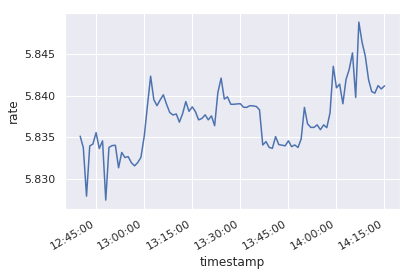

In [ ]:
while True:
    r = requests.get(url=URL, params=PARAMS)
    data = r.json()
    result = data['rates'][rate]
    ts = result['timestamp']
    cur = result['rate']
#     result['timestamp'] = datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    result['timestamp'] = mdates.date2num(datetime.fromtimestamp(ts))
    if ts != ts_old:
        fig, ax = plt.subplots()
        data_hist.append(result)
#         print(data_hist)
        dft = pd.DataFrame.from_dict(data_hist)
#         print(result)
        sns.lineplot(x="timestamp", y="rate", data=dft)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))#'%Y-%m-%d %H:%M:%S'))
        fig.autofmt_xdate()
        display(fig)
        clear_output(wait = True)
#         plt.pause(0.5)
        ts_old = ts